In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

from matplotlib.colors import ListedColormap

In [2]:
#folder for figures 
output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

In [3]:
cmap = np.genfromtxt('/home/ah278717/hansen_receptors/data/colourmap.csv', delimiter=',')
cmap_div = ListedColormap(cmap)

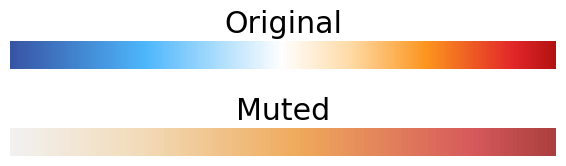

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import colorsys  # handles RGB ↔ HSV

df = pd.read_csv('/home/ah278717/hansen_receptors/data/colourmap.csv', delimiter=',', header=None)
colors = df.values  # RGB values between 0 and 1

# RGB → HSV
hsv = np.array([colorsys.rgb_to_hsv(*rgb) for rgb in colors])

# Muting: lower saturation & slightly dim
hsv[:,1] *= 0.7   # reduce saturation
hsv[:,2] *= 0.95  # reduce brightness

# HSV → RGB
muted_colors = np.array([colorsys.hsv_to_rgb(*h) for h in hsv])

# Make colormaps
orig_cmap = ListedColormap(colors)
muted_cmap = ListedColormap(muted_colors[128:, :])

# Visual compare
gradient = np.linspace(0, 1, 256).reshape(1, -1)

fig, axs = plt.subplots(2, 1, figsize=(6, 2))
axs[0].imshow(gradient, aspect='auto', cmap=orig_cmap)
axs[0].set_title("Original")
axs[1].imshow(gradient, aspect='auto', cmap=muted_cmap)
axs[1].set_title("Muted")

for ax in axs:
    ax.set_axis_off()

plt.tight_layout()
plt.show()

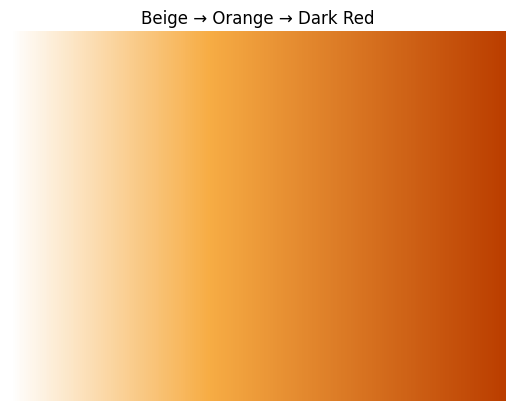

In [4]:
from matplotlib.colors import LinearSegmentedColormap

# 2. Create the colormap
colors = [
    (0.0, "#FFFFFF"),
    (0.4, '#F7AD45'),
    (1.0, '#BB3E00')
]
cmap = LinearSegmentedColormap.from_list("beige_orange_red", colors, N=256)

# 3. Show it
gradient = np.linspace(0, 1, 256).reshape(1, -1)

plt.imshow(gradient, aspect='auto', cmap=cmap)
plt.axis('off')
plt.title("Beige → Orange → Dark Red")
plt.show()

In [10]:
import cmcrameri.cm as cmc
from matplotlib.colors import LinearSegmentedColormap

n_colors = 256
roma = cmc.roma(np.linspace(0, 1, n_colors))
roma_red = roma[:n_colors//2]  # slice upper half
cmap = LinearSegmentedColormap.from_list("roma_red", roma_red)

## plots

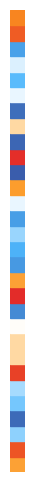

In [31]:
# Number of squares
n_squares = 30

cmap = np.genfromtxt('/home/ah278717/hansen_receptors/data/colourmap.csv', delimiter=',')
cmap_div = ListedColormap(cmap)

# Create a figure and axis with equal aspect ratio
fig, ax = plt.subplots(figsize=(2, 6))
ax.set_aspect('equal')  # Ensure squares are equal in width and height

# Plot the squares
for i in range(n_squares):
    # Randomly select a color index
    random_index = random.randint(0, len(cmap) - 1)
    color = cmap_div(random_index / len(cmap))  # Normalize the index
    # Add a square (rectangle with equal width and height)
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=color))

# Set the limits, remove the axes
ax.set_xlim(0, 1)
ax.set_ylim(0, n_squares)
ax.axis('off')

plt.savefig(os.path.join(output_dir,'vertical_bar_high_res.png'), dpi=300, bbox_inches='tight',transparent=True)


# Display the plot
plt.show()

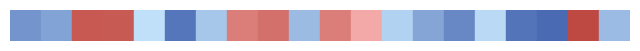

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.colors import LinearSegmentedColormap

# Define the color gradients: light-to-dark blue and light-to-dark red
# Light blue: RGB [180, 220, 250], Dark blue: RGB [50, 75, 150]
# Light red: RGB [250, 180, 180], Dark red: RGB [150, 50, 50]
light_blue = [194/255, 226/255, 251/255]
dark_blue = [70/255, 103/255, 177/255]
light_red = [250/255, 180/255, 180/255]
dark_red = [174/255, 44/255, 35/255]

# Create two linear colormaps: one for blue and one for red
blue_cmap = LinearSegmentedColormap.from_list("light_to_dark_blue", [light_blue, dark_blue])
red_cmap = LinearSegmentedColormap.from_list("light_to_dark_red", [light_red, dark_red])

# Number of squares
n_squares = 20

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
ax.set_aspect('equal')  # Ensure squares are equal in width and height

# Plot the squares
for i in range(n_squares):
    # Randomly choose between blue and red colormap
    chosen_cmap = blue_cmap if random.choice([True, False]) else red_cmap
    # Randomly sample a color from the chosen colormap
    random_value = random.random()  # Generate a random value between 0 and 1
    color = chosen_cmap(random_value)  # Sample a random color from the chosen colormap
    # Add a square (rectangle with equal width and height) for the horizontal bar
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set the limits, remove the axes
ax.set_xlim(0, n_squares)
ax.set_ylim(0, 1)
ax.axis('off')

# Save the plot with high resolution
plt.savefig(os.path.join(output_dir,'horizontal_bar_high_res.png'), dpi=300, bbox_inches='tight',transparent=True)

# Optionally, display the plot
plt.show()

/tmp/ipykernel_2836343/1911131225.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(


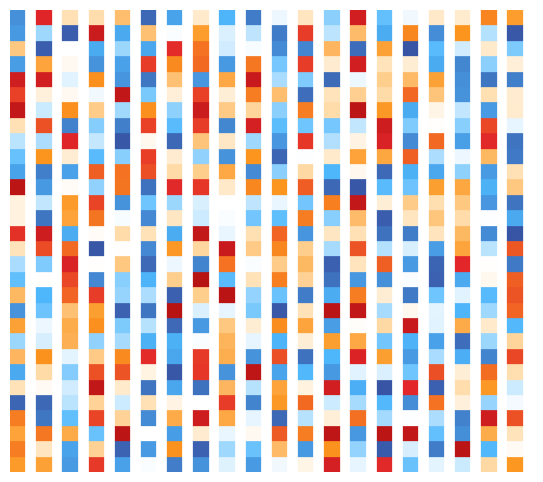

In [28]:
# Number of bars and squares
n_bars = 20
n_squares = 30
gap = 0.7  # Small gap between bars
border_width = 0.2 # Thickness of the black border around each bar

# Calculate the width of each bar including the gap
bar_width = 1 + gap

# Create a figure and axis with equal aspect ratio
fig, ax = plt.subplots(figsize=(n_bars * bar_width, 6))
ax.set_aspect('equal')  # Ensure squares are equal in width and height

# Plot the bars
for j in range(n_bars):
    for i in range(n_squares):
        # Randomly select a color index
        random_index = random.randint(0, len(cmap) - 1)
        color = cmap_div(random_index / len(cmap))  # Normalize the index
        # Add a square (rectangle with equal width and height) with a black border
        ax.add_patch(plt.Rectangle(
            (j * bar_width, i), 1, 1,
            color=color,
            edgecolor='black',
            linewidth=border_width
        ))

# Set the limits, remove the axes
ax.set_xlim(0, n_bars * bar_width)
ax.set_ylim(0, n_squares)
ax.axis('off')

# Save the plot with high resolution
plt.savefig(os.path.join(output_dir,'multiple_vertical_bars_with_border_high_res.png'), dpi=300, bbox_inches='tight', transparent=True)

# Optionally, display the plot
plt.show()

## receptors new colormap 

In [5]:
import pickle
import numpy as np
import pandas as pd
import nibabel as nib
from scipy.stats import zscore
import pickle 
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import seaborn as sns
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from nilearn.datasets import fetch_atlas_harvard_oxford, fetch_atlas_schaefer_2018
from nilearn import image, plotting
from params_and_paths import Paths, Params


paths = Paths()
params = Params()

In [7]:
atlas = fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_img = image.load_img(atlas.maps)
mask_img = image.new_img_like(atlas_img, image.get_data(atlas_img) != 0) #all cortical areas
masker = NiftiMasker(mask_img=mask_img)
masker.fit()

NiftiMasker(mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f1124d7de10>)

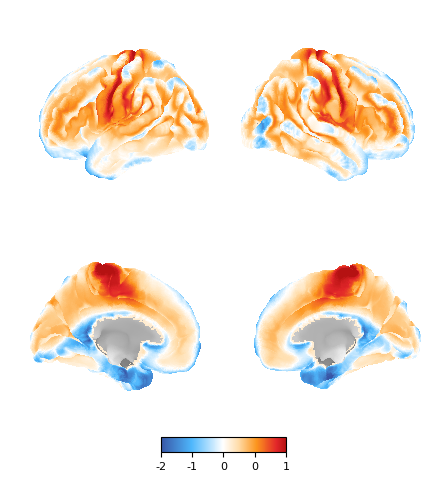

In [13]:
cmap = np.genfromtxt('/home/ah278717/hansen_receptors/data/colourmap.csv', delimiter=',')
cmap_div = ListedColormap(cmap)

input_dir = os.path.join(paths.home_dir,'receptors', 'PET2')

with open(os.path.join(input_dir, f'receptor_density_{params.mask}.pickle'), 'rb') as f:
    receptor_data = pickle.load(f)
    
data = masker.inverse_transform(zscore(receptor_data[:, 16]))
plotting.plot_img_on_surf(data, surf_mesh='fsaverage', threshold=1e-50,
                                hemispheres=['left', 'right'], views=['lateral', 'medial'],vmin=-2.5, vmax=1.9,
                                colorbar=True, cmap = cmap_div, symmetric_cbar=False, bg_on_data=False)
fig_fname = 'surface_receptor_cortical_NET_noBG.png'
plt.savefig(os.path.join(output_dir, fig_fname),dpi=300, bbox_inches='tight',transparent=True)


## inflated PET masks

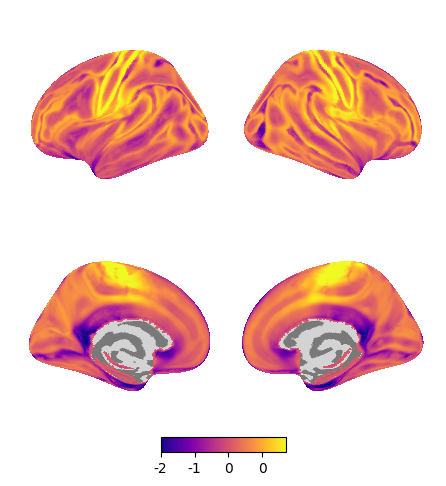

In [8]:
#NET
input_dir = os.path.join(paths.home_dir,'receptors', 'PET2')

with open(os.path.join(input_dir, f'receptor_density_{params.mask}.pickle'), 'rb') as f:
    receptor_data = pickle.load(f)
    
data = masker.inverse_transform(zscore(receptor_data[:, 16]))
plotting.plot_img_on_surf(data, surf_mesh='fsaverage', threshold=1e-50, inflate = True,
                                hemispheres=['left', 'right'], views=['lateral', 'medial'],vmin=-2.1, vmax=1.6,
                                colorbar=True, cmap = 'plasma', symmetric_cbar=False, bg_on_data=False)
fig_fname = 'surface_receptor_cortical_NET_inflated.png'
plt.savefig(os.path.join(output_dir, fig_fname),dpi=300, bbox_inches='tight',transparent=True)

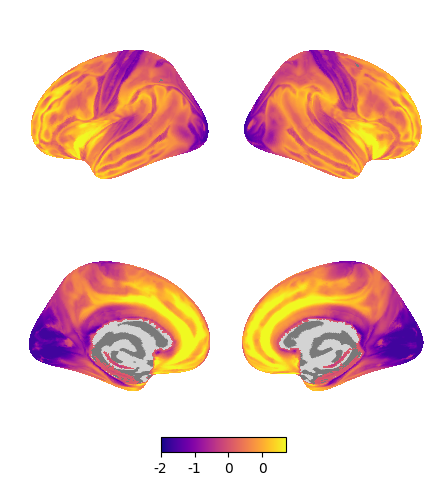

In [9]:
#MOR
input_dir = os.path.join(paths.home_dir,'receptors', 'PET2')

with open(os.path.join(input_dir, f'receptor_density_{params.mask}.pickle'), 'rb') as f:
    receptor_data = pickle.load(f)
    
data = masker.inverse_transform(zscore(receptor_data[:, 15]))
plotting.plot_img_on_surf(data, surf_mesh='fsaverage', threshold=1e-50, inflate = True,
                                hemispheres=['left', 'right'], views=['lateral', 'medial'],vmin=-2.1, vmax=1.6,
                                colorbar=True, cmap = 'plasma', symmetric_cbar=False, bg_on_data=False)
fig_fname = 'surface_receptor_cortical_MOR_inflated.png'
plt.savefig(os.path.join(output_dir, fig_fname),dpi=300, bbox_inches='tight',transparent=True)

## Example fMRI beta map: MarkovGuess surprise

In [6]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.glm.second_level import SecondLevelModel
from nilearn import plotting, image
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from sklearn.linear_model import LinearRegression
import main_funcs as mf
import nibabel as nib
from scipy.stats import zscore
from params_and_paths import Paths, Params, Receptors
from dominance_stats import dominance_stats
from nilearn.datasets import fetch_atlas_harvard_oxford, fetch_atlas_schaefer_2018

In [7]:
paths = Paths()
params = Params()
rec = Receptors()

In [8]:
latent_var = 'surprise'
db = 'PNAS'
ignore = []

In [9]:
if db == 'Explore':
    plot_path = os.path.join(output_dir, params.model, 'plot_raw')
    if not os.path.exists(plot_path):
        os.makedirs(plot_path) 
    beta_dir = os.path.join(paths.home_dir,db,params.mask,'first_level',params.model)
else:
    plot_path = os.path.join(output_dir, 'plot_raw')
    if not os.path.exists(plot_path):
        os.makedirs(plot_path) 
    beta_dir = os.path.join(paths.home_dir,db,params.mask,'first_level')


In [10]:
fmri_dir = mf.get_fmri_dir(db)
subjects = mf.get_subjects(db, fmri_dir)
subjects = [subj for subj in subjects if subj not in ignore]

eff_size_files = []
for sub in subjects:
    #get contrast data (beta estimates) and concatinate
    ef_size = nib.load(os.path.join(beta_dir,f'sub-{sub:02d}_{latent_var}_{params.mask}_effect_size_map.nii.gz'))
    eff_size_files.append(ef_size)

#second level model:
design_matrix = pd.DataFrame([1] * len(eff_size_files),
                                columns=['intercept']) #one sample test
second_level_model = SecondLevelModel(smoothing_fwhm=params.smoothing_fwhm)
second_level_model = second_level_model.fit(eff_size_files,
                                            design_matrix=design_matrix)

ValueError: Found 0 subjects but experiment has: 21.

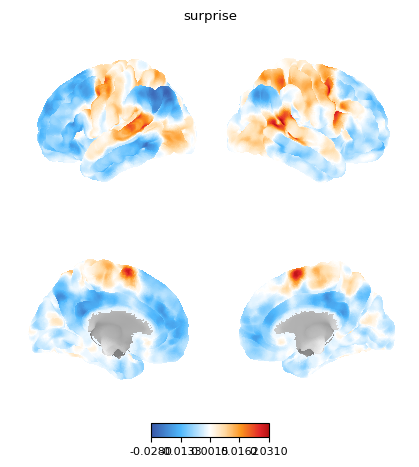

In [10]:
plt.rcParams.update({'font.size': 8})
effect_map = second_level_model.compute_contrast(output_type='effect_size')
fname = f'{latent_var}_{params.mask}_effect_map.nii.gz'
nib.save(effect_map, os.path.join(output_dir, fname))
plotting.plot_img_on_surf(effect_map, surf_mesh='fsaverage', 
                                        hemispheres=['left', 'right'], views=['lateral', 'medial'], threshold=1e-50, vmin=-0.028, vmax=0.031,
                                        title=latent_var, colorbar=True, cmap = cmap_div, symmetric_cbar=False, bg_on_data=False, cbar_tick_format='%.4f')
fname = f'markov_{latent_var}_effect_map_nobg.png' 
plt.savefig(os.path.join(output_dir, fname),dpi=300, bbox_inches='tight',transparent=True)

## EncodeProb

In [7]:
latent_var = 'surprise'
db = 'EncodeProb'


In [8]:
if db == 'Explore':
    plot_path = os.path.join(output_dir, params.model, 'plot_raw')
    if not os.path.exists(plot_path):
        os.makedirs(plot_path) 
    beta_dir = os.path.join(paths.home_dir,db,params.mask,'first_level',params.model)
else:
    plot_path = os.path.join(output_dir, 'plot_raw')
    if not os.path.exists(plot_path):
        os.makedirs(plot_path) 
    beta_dir = os.path.join(paths.home_dir,db,params.mask,'first_level')


In [9]:
fmri_dir = mf.get_fmri_dir(db)
subjects = mf.get_subjects(db, fmri_dir)
subjects = [subj for subj in subjects if subj not in params.ignore]

eff_size_files = []
for sub in subjects:
    #get contrast data (beta estimates) and concatinate
    ef_size = nib.load(os.path.join(beta_dir,f'sub-{sub:02d}_{latent_var}_{params.mask}_effect_size_map.nii.gz'))
    eff_size_files.append(ef_size)

#second level model:
design_matrix = pd.DataFrame([1] * len(eff_size_files),
                                columns=['intercept']) #one sample test
second_level_model = SecondLevelModel(smoothing_fwhm=params.smoothing_fwhm)
second_level_model = second_level_model.fit(eff_size_files,
                                            design_matrix=design_matrix)

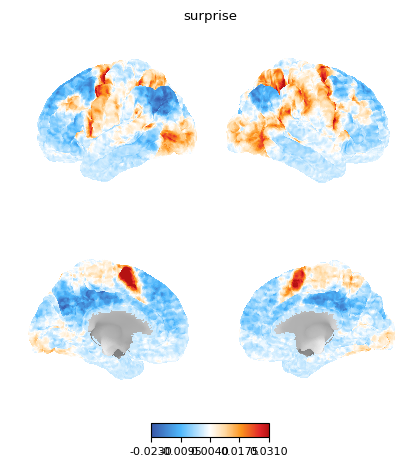

In [23]:
plt.rcParams.update({'font.size': 8})
effect_map = second_level_model.compute_contrast(output_type='effect_size')
fname = f'{latent_var}_{params.mask}_effect_map.nii.gz'
nib.save(effect_map, os.path.join(output_dir, fname))
plotting.plot_img_on_surf(effect_map, surf_mesh='fsaverage', 
                                        hemispheres=['left', 'right'], views=['lateral', 'medial'], threshold=1e-50, vmin=-0.023, vmax=0.031,
                                        title=latent_var, colorbar=True, cmap = cmap_div, symmetric_cbar=False, bg_on_data=False, cbar_tick_format='%.4f')
fname = f'encode_{latent_var}_effect_map_nobg.png' 
plt.savefig(os.path.join(output_dir, fname),dpi=300, bbox_inches='tight',transparent=True)

## plot group level effects - confidence

In [2]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.glm.second_level import SecondLevelModel
from nilearn import plotting, image
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from sklearn.linear_model import LinearRegression
import main_funcs as mf
import nibabel as nib
from scipy.stats import zscore
from params_and_paths import Paths, Params, Receptors
from dominance_stats import dominance_stats
from nilearn.datasets import fetch_atlas_harvard_oxford, fetch_atlas_schaefer_2018

In [3]:
paths = Paths()
params = Params()
rec = Receptors()

In [4]:
#folder for figures 
output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

In [5]:
latent_var = 'surprise'
db = 'NAConf'
ignore = [3, 5, 6, 9, 36, 51, 54]


In [6]:
if db == 'Explore':
    plot_path = os.path.join(output_dir, params.model, 'plot_raw')
    if not os.path.exists(plot_path):
        os.makedirs(plot_path) 
    beta_dir = os.path.join(paths.home_dir,db,params.mask,'first_level',params.model)
else:
    plot_path = os.path.join(output_dir, 'plot_raw')
    if not os.path.exists(plot_path):
        os.makedirs(plot_path) 
    beta_dir = os.path.join(paths.home_dir,db,params.mask,'first_level')


In [7]:
fmri_dir = mf.get_fmri_dir(db)
subjects = mf.get_subjects(db, fmri_dir)
subjects = [subj for subj in subjects if subj not in ignore]

eff_size_files = []
for sub in subjects:
    #get contrast data (beta estimates) and concatinate
    ef_size = nib.load(os.path.join(beta_dir,f'sub-{sub:02d}_{latent_var}_{params.mask}_effect_size_map.nii.gz'))
    eff_size_files.append(ef_size)

#second level model:
design_matrix = pd.DataFrame([1] * len(eff_size_files),
                                columns=['intercept']) #one sample test
second_level_model = SecondLevelModel(smoothing_fwhm=params.smoothing_fwhm)
second_level_model = second_level_model.fit(eff_size_files,
                                            design_matrix=design_matrix)

/home/ah278717/neuromodulation_assay/.venv/lib/python3.10/site-packages/nilearn/glm/_utils.py:205: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1.0 / X)


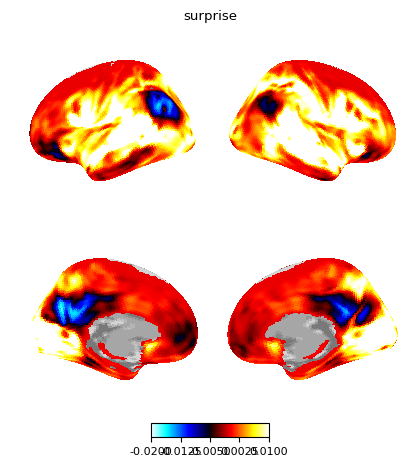

In [8]:
plt.rcParams.update({'font.size': 8})
effect_map = second_level_model.compute_contrast(output_type='effect_size')
fname = f'{latent_var}_{params.mask}_effect_map.nii.gz'
plotting.plot_img_on_surf(effect_map, surf_mesh='fsaverage5', 
                                        hemispheres=['left', 'right'], views=['lateral', 'medial'], threshold=1e-15, inflate= True, vmin=-0.02, vmax=0.01,
                                        title=latent_var, colorbar=True, cmap = 'cold_hot', symmetric_cbar=False, bg_on_data=False, cbar_tick_format='%.4f')
fname = f'{db}_{latent_var}_effect_map_plasma.png' 
plt.savefig(os.path.join(output_dir, fname),dpi=300, bbox_inches='tight',transparent=True)

/home/ah278717/neuromodulation_assay/.venv/lib/python3.10/site-packages/nilearn/glm/_utils.py:205: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1.0 / X)


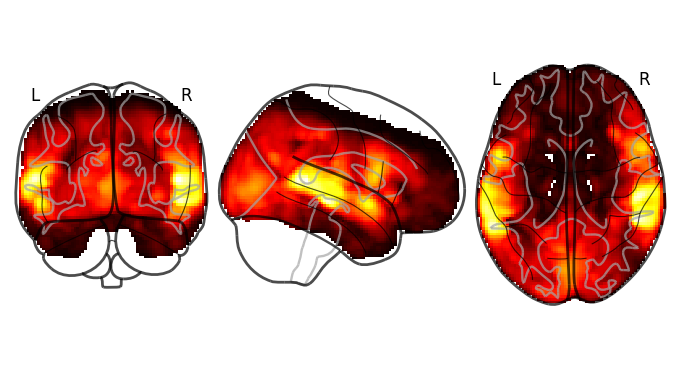

In [17]:
#plot glassbrain for NAConf
plt.rcParams.update({'font.size': 8})
effect_map = second_level_model.compute_contrast(output_type='effect_size')
plotting.plot_glass_brain(effect_map, cmap = 'cold_hot',symmetric_cbar=True)

In [10]:
#plot confidence with inverse colormap for Explore
#vmin=-0.02, vmax=0.01,

# plt.rcParams.update({'font.size': 8})
# effect_map = second_level_model.compute_contrast(output_type='effect_size')
# fname = f'{latent_var}_{params.mask}_effect_map.nii.gz'
# nib.save(effect_map, os.path.join(output_dir, fname))
# plotting.plot_img_on_surf(effect_map, surf_mesh='fsaverage5', 
#                                         hemispheres=['left', 'right'], views=['lateral', 'medial'], threshold=1e-15, inflate= True, vmin=-0.02, vmax=0.0155,
#                                         title=latent_var, colorbar=True, cmap = 'cold_hot_r', symmetric_cbar=False, bg_on_data=False, cbar_tick_format='%.4f')
# fname = f'{db}_{latent_var}_effect_map_plasma.png' 
# plt.savefig(os.path.join(output_dir, fname),dpi=300, bbox_inches='tight',transparent=True)

## legend for dominance plot

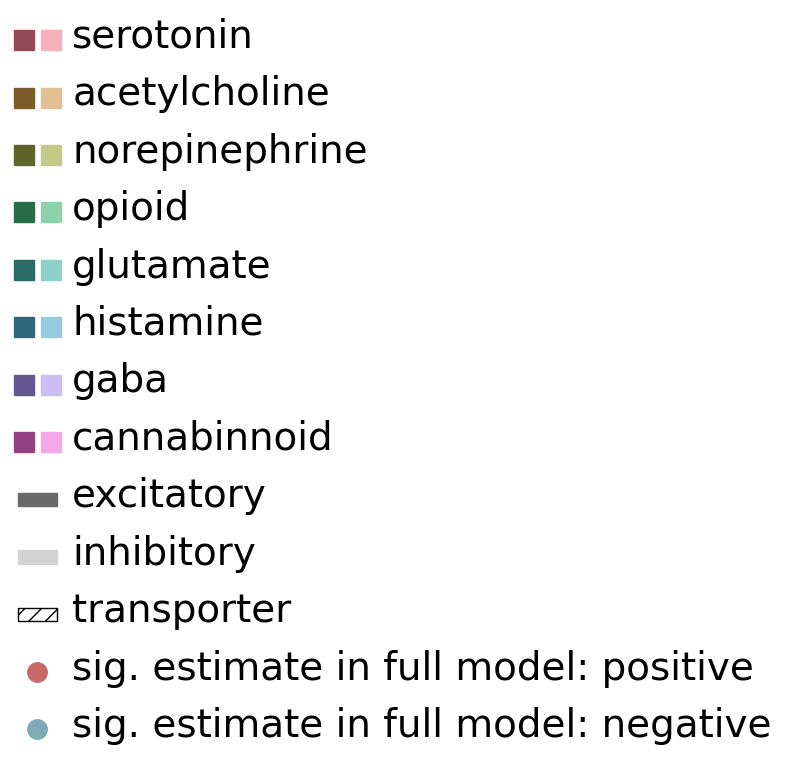

In [14]:
import os
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

from params_and_paths import Paths, Params, Receptors
paths = Paths()
params = Params()
rec = Receptors()

plt.rcParams.update({'font.size': 14})

if rec.source in ['PET', 'PET2']:
        receptor_groups = [rec.serotonin, rec.acetylcholine, rec.noradrenaline, rec.opioid, rec.glutamate, rec.histamine, rec.gaba, rec.cannabinnoid]
        group_names = ['serotonin', 'acetylcholine', 'norepinephrine', 'opioid', 'glutamate', 'histamine', 'gaba', 'cannabinnoid']

# Define color palette for groups
base_colors = sns.color_palette('husl', len(group_names))

# Define the legend elements and labels
legend_elements = []
legend_labels = []

# Add patches with adjacent light and dark squares for each receptor group
for group_idx, (color, name) in enumerate(zip(base_colors, group_names)):
    dark_color = sns.dark_palette(color, n_colors=3)[1]
    light_color = sns.light_palette(color, n_colors=3)[1]
    
    # Create two small squares next to each other
    dark_square = mlines.Line2D([], [], color=dark_color, marker='s', markersize=14, linestyle='None')
    light_square = mlines.Line2D([], [], color=light_color, marker='s', markersize=14, linestyle='None')
    
    # Add the tuple of squares and the group name
    legend_elements.append((dark_square, light_square))
    legend_labels.append(name)

# Add grey patches for excitatory/inhibitory distinction
dark_grey_patch = mpatches.Patch(color="dimgray", label="excitatory")
light_grey_patch = mpatches.Patch(color="lightgrey", label="inhibitory")
legend_elements.extend([dark_grey_patch, light_grey_patch])
legend_labels.extend(["excitatory", "inhibitory"])

# Add a hatch pattern example for transporters
hatch_example = mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='transporter')
legend_elements.append(hatch_example)
legend_labels.append("transporter")

# Add red and blue dots to indicate positive/negative correlations
red_dot = mlines.Line2D([], [], color='#C96868', marker='o', markersize=14, linestyle='None', label="significant estimate in full model: positive")
blue_dot = mlines.Line2D([], [], color='#7EACB5', marker='o', markersize=14, linestyle='None', label="significant estimate in full model: negative")
legend_elements.extend([red_dot, blue_dot])
legend_labels.extend(["sig. estimate in full model: positive", "sig. estimate in full model: negative"])

# Create a custom legend with both horizontal and vertical spacing
fig, ax = plt.subplots(figsize=(2, 4))
custom_legend = ax.legend(
    legend_elements, 
    legend_labels, 
    handler_map={
        tuple: HandlerTuple(ndivide=None, pad=0.8)  # Horizontal padding between squares
    },
    loc='center', ncol=1, frameon=False,
    labelspacing=1  # Vertical spacing between rows
)
ax.axis('off')

#bigger writing for poster 
for text in ax.get_figure().findobj(plt.Text):
    text.set_fontsize(28)

fname = f'dominance_legend.png' 
plt.savefig(os.path.join(output_dir, fname),dpi=300, bbox_inches='tight',transparent=True)
# Remove axis for clean legend display
plt.show()


## mean z maps for poster 

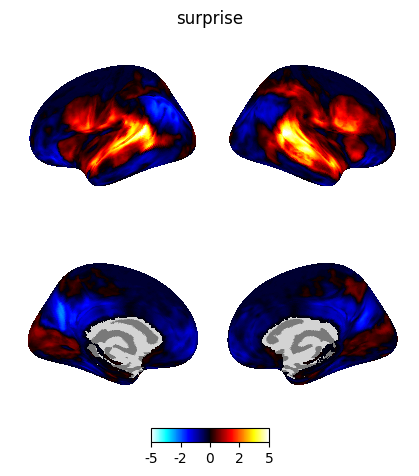

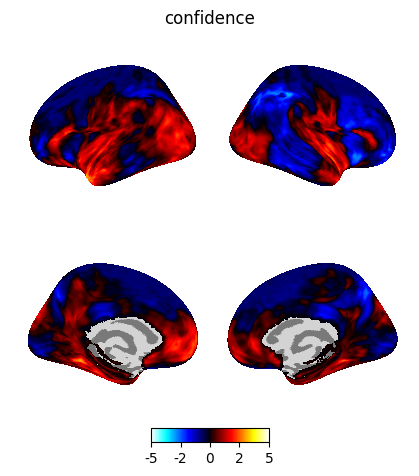

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import nibabel as nib
import main_funcs as mf
from nilearn import plotting, image
from scipy.stats import zscore
from scipy.stats import norm, ttest_1samp
from params_and_paths import Paths, Params, Receptors
from nilearn.datasets import fetch_atlas_harvard_oxford, fetch_atlas_schaefer_2018
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import fmri_funcs as fun
import main_funcs as mf


paths = Paths()
params = Params()

#folder for figures 
output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

if params.db == 'Explore':
        input_dir = os.path.join(paths.home_dir,params.db,params.mask,'first_level',params.model)
else:
    input_dir = os.path.join(paths.home_dir,params.db,params.mask,'first_level')

fmri_dir = mf.get_fmri_dir(params.db)
subjects = mf.get_subjects(params.db, fmri_dir)
subjects = [subj for subj in subjects if subj not in params.ignore] 

add_info = ""

#loop through variables 
for latent_var in ['surprise', 'confidence']:
    all_data = []
    #loop though subjects
    for sub in subjects:

        json_file_dir = mf.get_json_dir(params.db)
        tr = fun.get_tr(params.db, sub, 1, json_file_dir) # in seconds
        masker = fun.get_masker(fmri_dir,tr, params.smoothing_fwhm)
         
        # take fdata and average, ignore NAN
        data = np.load(os.path.join(input_dir,f'sub-{sub:02d}_{latent_var}_schaefer_effect_size{add_info}.pickle'), allow_pickle=True)
        #assign this to the nii structure
        all_data.append(data)

    #alternativly:
    stacked_arrays = np.stack(all_data, axis=0)
    mean_array = np.nanmean(stacked_arrays, axis=0) 
    # std_array = np.nanstd(stacked_arrays, axis=0)      
    # z_score = (mean_array) / (std_array)
    z_score = zscore(mean_array, axis=None, nan_policy='omit')


    plot_data = masker.inverse_transform(z_score)

    # plot 
    plotting.plot_img_on_surf(plot_data, surf_mesh='fsaverage', 
                                                hemispheres=['left', 'right'], views=['lateral', 'medial'], threshold=1e-80, vmin=-5, vmax=5,
                                                title=latent_var, colorbar=True, cmap = 'cold_hot',inflate=True, symmetric_cbar=True)

    fname = f'{params.db}_{latent_var}_zmap.png' 
    plt.savefig(os.path.join(output_dir,'z_maps', fname),dpi=300, bbox_inches='tight',transparent=True)

    

## dominance plots for conference paper

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests
from params_and_paths import Paths, Params, Receptors
from matplotlib.ticker import FormatStrFormatter
from statsmodels.stats.multitest import fdrcorrection



paths = Paths()
params = Params()
rec = Receptors()

In [7]:
mask = 'schaefer'
laten_var_int = ['surprise', 'confidence']
experiments =['EncodeProb','NAConf', 'PNAS']

output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

In [8]:
if rec.source in ['PET', 'PET2']:
        receptor_groups = [rec.serotonin, rec.acetylcholine, rec.noradrenaline, rec.opioid, rec.glutamate, rec.histamine, rec.gaba, rec.dopamine, rec.cannabinnoid]
receptor_class = [rec.exc,rec.inh]

receptor_label_formatted = [
    '$5\\text{-}\\mathrm{HT}_{\\mathrm{1a}}$',
    '$5\\text{-}\\mathrm{HT}_{\\mathrm{1b}}$',
    '$5\\text{-}\\mathrm{HT}_{\\mathrm{2a}}$',
    '$5\\text{-}\\mathrm{HT}_{\\mathrm{4}}$',
    '$5\\text{-}\\mathrm{HT}_{\\mathrm{6}}$',
    '$5\\text{-}\\mathrm{HTT}$',
    '$\\mathrm{A}_{\\mathrm{4}}\\mathrm{B}_{\\mathrm{2}}$',
    '$\\mathrm{M}_{\\mathrm{1}}$',
    '$\\mathrm{VAChT}$',
    '$\\mathrm{NET}$',
    '$\\mathrm{A}_{\\mathrm{2}}$',
    '$\\mathrm{MOR}$',
    '$\\mathrm{m}\\mathrm{GluR}_{\\mathrm{5}}$',
    '$\\mathrm{NMDA}$',
    '$\\mathrm{H}_{\\mathrm{3}}$',
    '$\\mathrm{GABA}_{\\mathrm{a}}$',
    '$\\mathrm{D}_{\\mathrm{1}}$',
    '$\\mathrm{D}_{\\mathrm{2}}$',
    '$\\mathrm{DAT}$',
    '$\\mathrm{CB}_{\\mathrm{1}}$'
]


### mean domainance bar plot:summarize by subject

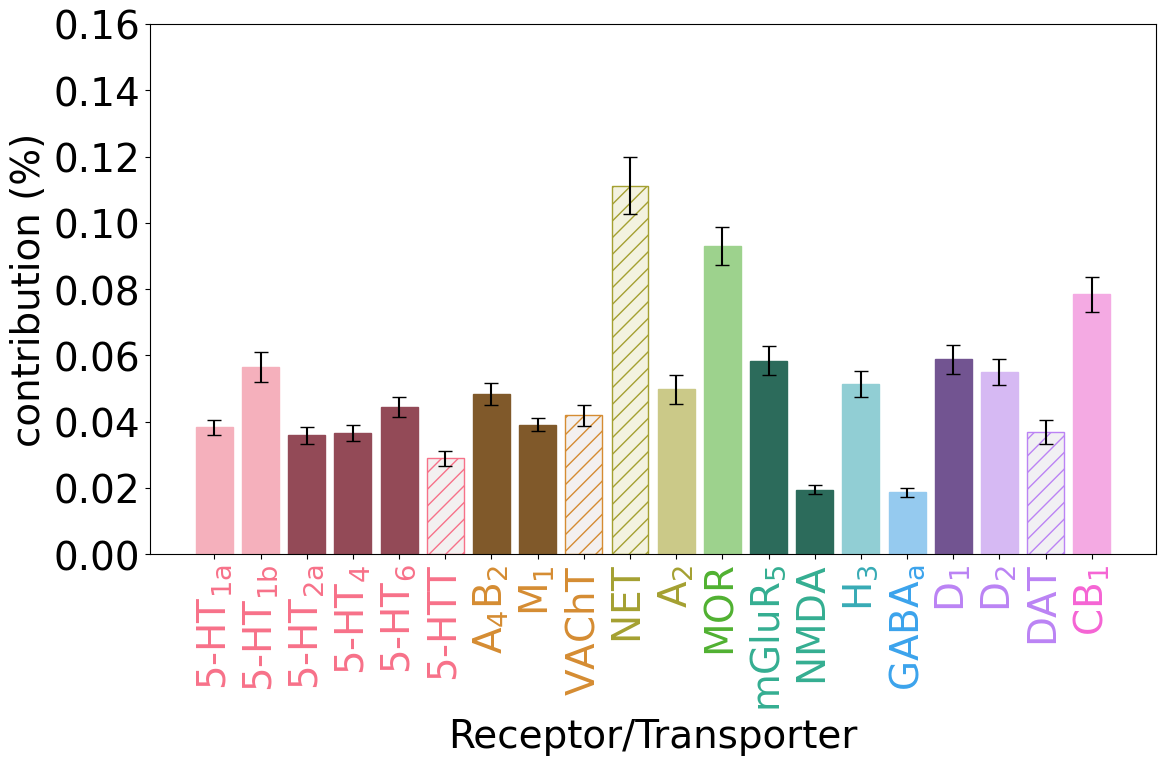

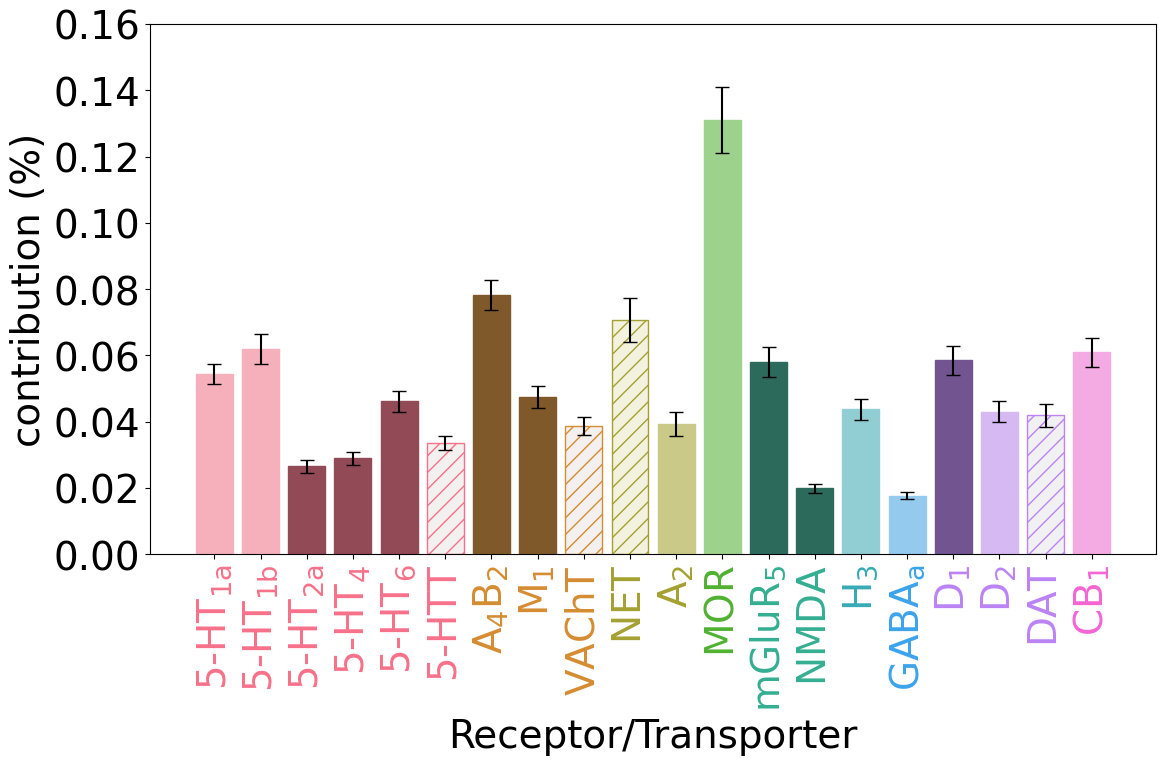

In [11]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'font.size': 18})


for latent_var in laten_var_int:
    results_list = []
    signs_mean_list = []
    for exp in experiments:
        beta_dir = os.path.join(paths.home_dir, exp, params.mask,'first_level')
        input_dir = os.path.join(beta_dir, 'regressions', 'PET2')
        results_df = pd.read_pickle(os.path.join(input_dir, f'{latent_var}_{mask}_dominance_allsubj_lin+quad.pickle'))
        if 'a2' in results_df.columns:
            results_df.rename(columns={'a2': 'A2'}, inplace=True)
        results_list.append(results_df)

    results_all = pd.concat(results_list, axis=0, ignore_index=True)

    receptor_to_group = {}
    for group_idx, group in enumerate(receptor_groups):
        for receptor in group:
            receptor_to_group[receptor] = group_idx

    ordered_receptors = [receptor for group in receptor_groups for receptor in group]

    receptor_to_class = {}
    for class_idx, class_group in enumerate(receptor_class):
        for receptor in class_group:
            receptor_to_class[receptor] = class_idx

    # Assign colors to each group
    base_colors = sns.color_palette('husl', len(receptor_groups))
    colors = []
    for receptor in ordered_receptors:
        group_idx = receptor_to_group.get(receptor, -1)
        class_type = receptor_to_class.get(receptor, -1)
        if class_type == 0:  # Excitatory
            color = sns.dark_palette(base_colors[group_idx], n_colors=3)[1]
            colors.append({'face': color, 'edge': color})
        elif class_type == 1:  # Inhibitory
            color = sns.light_palette(base_colors[group_idx], n_colors=3)[1]
            colors.append({'face': color, 'edge': color})
        else:
            face_color = sns.light_palette(base_colors[group_idx], n_colors=3)[0]
            edge_color = sns.dark_palette(base_colors[group_idx], n_colors=3)[2]
            colors.append({'face': face_color, 'edge': edge_color})

    fig, ax = plt.subplots(figsize=(12, 8))

    # Standardize the data by total model fit
    standardized_df = results_all[ordered_receptors].div(results_all[ordered_receptors].sum(axis=1), axis=0)

    sem_data = standardized_df[ordered_receptors].sem() 
    bar_data = standardized_df[ordered_receptors].mean()
    bar_data = bar_data.reset_index()
    bar_data.columns = ['receptor', 'mean_value']
    bar_data['sem'] = sem_data.values

    # if latent_var == 'confidence':
    #     bar_data.iloc[11,1]+= 0.025
    #     bar_data.iloc[0,1] -= 0.025

    bars = ax.bar(bar_data['receptor'], bar_data['mean_value'], yerr=bar_data['sem'],
                color=[color['face'] for color in colors], edgecolor=[color['edge'] for color in colors], capsize=5)
        
    # Manually add hatch patterns
    for i, (receptor, color) in enumerate(zip(ordered_receptors, colors)):
        if receptor not in receptor_class[0] and receptor not in receptor_class[1]:
            bars[i].set_hatch('//')

        for i, receptor in enumerate(bar_data['receptor']):
            significant_across_experiments = []
            consistent_signs = []
            p_values = []
        
            # for exp in experiments:
            #     fname = f'{latent_var}_{mask}_regression_results_bysubject_all_lin+quad.csv'
            #     sign_results = pd.read_csv(os.path.join(paths.home_dir, exp, params.mask, 'first_level', 'noEntropy_noER','regressions', 'PET2', fname))
                
            #     # Perform t-tests for all receptors within this experiment
            #     exp_p_values = []
            #     for rec in bar_data['receptor']:
            #         t_stat, p_value = ttest_1samp(sign_results[rec], 0)
            #         exp_p_values.append(p_value)
                
            #     # Apply FDR correction within this experiment (across 20 receptors)
            #     _, corrected_p_values = fdrcorrection(exp_p_values, alpha=0.05)
                
            #     # Get the corrected p-value for the current receptor
            #     receptor_index = list(bar_data['receptor']).index(receptor)
            #     corrected_p_value = corrected_p_values[receptor_index]
                
            #     # Store significance and sign
            #     significant_across_experiments.append(corrected_p_value < 0.05)
            #     consistent_signs.append(np.sign(sign_results[receptor].mean()))

            
            # # Check if the receptor is significant in all experiments and has the same sign
            # if all(significant_across_experiments) and (len(set(consistent_signs)) == 1):
            #     mean_value = bar_data['mean_value'].iloc[i]
            #     sem = bar_data['sem'].iloc[i]
            #     sign_val = consistent_signs[0]
            #     dot_color = '#C96868' if sign_val > 0 else '#7EACB5'
            #     y_position = mean_value + sem + 0.01
            #     ax.plot(i, y_position, 'o', color=dot_color, markersize=8, label='_nolegend_')

    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    ax.set_xticks(np.arange(len(ordered_receptors)))
    ax.set_xticklabels(receptor_label_formatted, rotation=90)
    for label, receptor in zip(ax.get_xticklabels(), ordered_receptors):
        group_idx = receptor_to_group.get(receptor, -1)
        label.set_color(base_colors[group_idx])
    ax.set_xlabel('Receptor/Transporter')
    ax.set_ylabel('contribution (%)')
    ax.set_ylim(top=0.16)
    
    #fname = f'{latent_var}_mean_dominance.png'
    fname = f'{latent_var}_schaefer_dominance.png'

    # fig_dir = os.path.join(output_dir, 'plots')
    # if not os.path.exists(fig_dir):
    #     os.makedirs(fig_dir)
    # plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight')
    # # = f'{latent_var}_mean_dominance.svg'
    # #plt.savefig(os.path.join(fig_dir, fname), bbox_inches='tight',transparent=True)

    for text in ax.get_figure().findobj(plt.Text):
        text.set_fontsize(28)

    plt.tight_layout()


    fname = f'{latent_var}_mean_dominance_poster.png'
    fig_dir = os.path.join(output_dir, 'plots')
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    #plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight', transparent=True)
    fname = f'{latent_var}_mean_dominance_poster_lin+quad.pdf'
    plt.savefig(os.path.join(fig_dir, fname))


### heatmap for individual dominance results

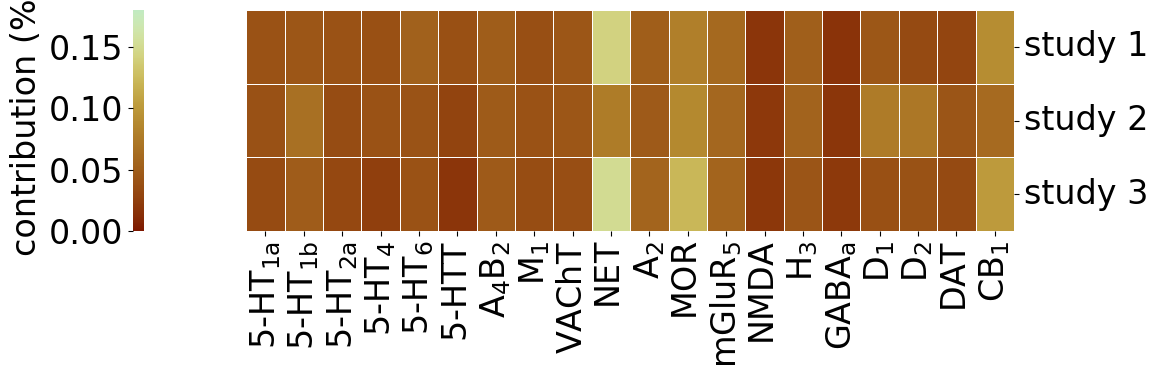

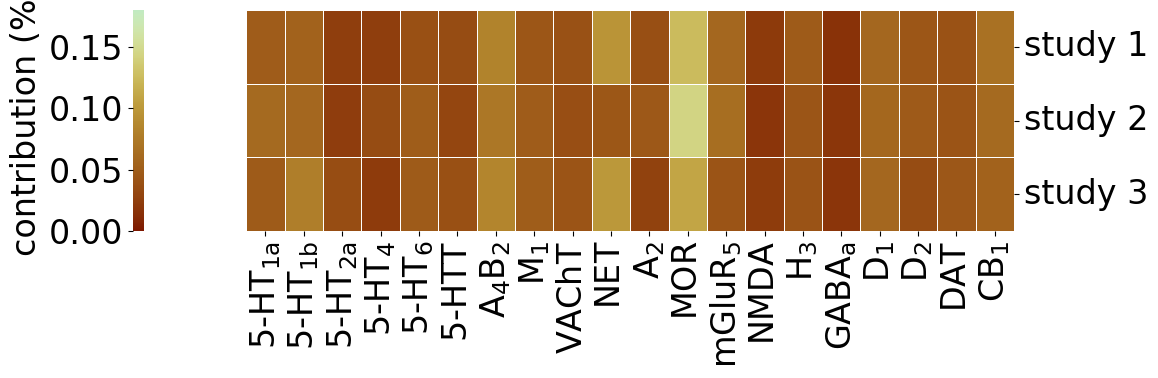

In [11]:
from matplotlib.colors import ListedColormap

beta_dir = os.path.join(paths.home_dir,params.db,params.mask,'first_level')
# cmap = np.genfromtxt('/home/ah278717/hansen_receptors/data/colourmap.csv', delimiter=',')
#cmap_seq = ListedColormap(cmap[128:, :])

# colors = ['#FFFFFF', '#C96868']  
# cmap_seq = LinearSegmentedColormap.from_list('custom_white_to_red', colors)
cmap_seq = cmap
receptor_to_group = {}
for group_idx, group in enumerate(receptor_groups):
    for receptor in group:
        receptor_to_group[receptor] = group_idx

ordered_receptors = [receptor for group in receptor_groups for receptor in group]

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
for latent_var in laten_var_int:
    results_list = []
    signs_mean_list = []
    plt.rcParams.update({'font.size': 14})
    for indx, exp in enumerate(experiments):
        beta_dir = os.path.join(paths.home_dir,exp,params.mask,'first_level')
        input_dir = os.path.join(beta_dir, 'regressions', 'PET2')
        results_df = pd.read_pickle(os.path.join(input_dir, f'{latent_var}_{mask}_dominance_allsubj_lin+quad.pickle'))        
        if 'a2' in results_df.columns:
            results_df.rename(columns={'a2': 'A2'}, inplace=True)
        standardized_df = results_df[ordered_receptors].div(results_df[ordered_receptors].sum(axis=1), axis=0)
        results_mean = standardized_df.mean(axis=0)
        results_mean.name = f'study {indx+1}'
        results_list.append(results_mean)

    all_means=pd.concat(results_list, axis=1).T

    fig, ax = plt.subplots(figsize=(12, 4))
    if latent_var == 'surprise':
        sns.heatmap(all_means[ordered_receptors],
                    xticklabels=receptor_label_formatted,
                    cmap=cmap_seq, linewidths=.5, vmin=0, vmax=0.18,cbar_kws = dict(location="left", label='contribution (%)'))
    else:
        sns.heatmap(all_means[ordered_receptors],
            xticklabels=receptor_label_formatted,
                    cmap=cmap_seq, linewidths=.5, vmin=0, vmax=0.18,cbar_kws = dict(location="left", label='contribution (%)'))
    #ax.tick_params(right=True, labelright=True, labelrotation=0)
    plt.yticks(rotation=0) 

    # fname = f'{latent_var}_mean_dominance_heatmap.png'
    # fig_dir = os.path.join(output_dir, 'plots')
    # if not os.path.exists(fig_dir):
    #     os.makedirs(fig_dir)
    # plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight')

    for text in ax.get_figure().findobj(plt.Text):
            text.set_fontsize(24)
    plt.tight_layout()


    fname = f'{latent_var}_mean_dominance_heatmap_poster.png'
    fig_dir = os.path.join(output_dir, 'plots')
    #plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight', transparent=True)
    fname = f'{latent_var}_mean_dominance_heatmap_poster_lin+quad.pdf'
    plt.savefig(os.path.join(fig_dir, fname))

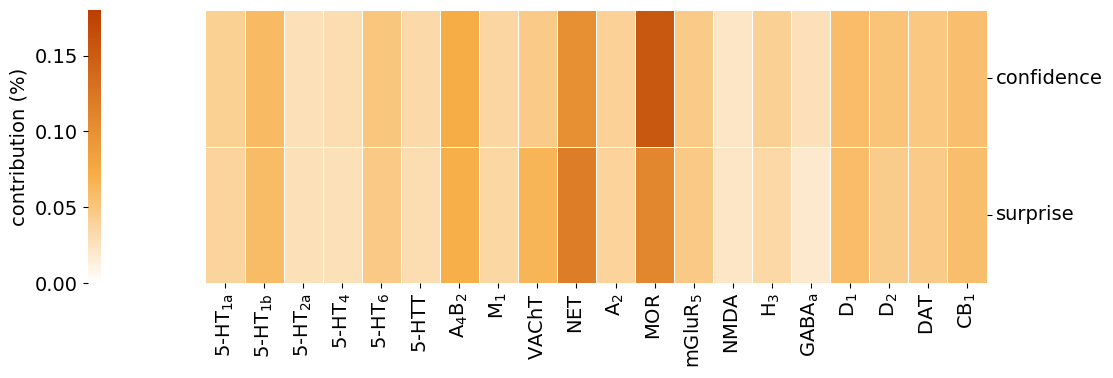

In [16]:
#heatmap for explore: confidence and suprise 
from matplotlib.colors import ListedColormap

mask = 'schaefer'

laten_var_int = ['confidence', 'surprise']
exp = 'Explore'

output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

beta_dir = os.path.join(paths.home_dir,params.db,params.mask,'first_level', 'noEntropy_noER')
# cmap = np.genfromtxt('/home/ah278717/hansen_receptors/data/colourmap.csv', delimiter=',')
#cmap_seq = sns.color_palette("3A6D8C", as_cmap=True)
# cmap_seq = ListedColormap(cmap[128:, :])

# colors = ['#FFFFFF', '#C96868']  
# cmap_seq = LinearSegmentedColormap.from_list('custom_white_to_red', colors)

receptor_to_group = {}
for group_idx, group in enumerate(receptor_groups):
    for receptor in group:
        receptor_to_group[receptor] = group_idx

ordered_receptors = [receptor for group in receptor_groups for receptor in group]

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
results_list = []
for indx, latent_var in enumerate(laten_var_int):
    plt.rcParams.update({'font.size': 14})
    beta_dir = os.path.join(paths.home_dir,exp,params.mask,'first_level', 'noEntropy_noER')
    input_dir = os.path.join(beta_dir, 'regressions', 'PET2')
    results_df = pd.read_pickle(os.path.join(input_dir, f'{latent_var}_{mask}_dominance_allsubj_lin+quad.pickle'))
    if 'a2' in results_df.columns:
        results_df.rename(columns={'a2': 'A2'}, inplace=True)
    standardized_df = results_df[ordered_receptors].div(results_df[ordered_receptors].sum(axis=1), axis=0)
    results_mean = standardized_df.mean(axis=0)
    results_mean.name = latent_var
    results_list.append(results_mean)

fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(all_means[ordered_receptors],
            xticklabels=receptor_label_formatted,
            cmap=cmap_seq, linewidths=.5, vmin=0, vmax=0.18,cbar_kws = dict(location="left", label='contribution (%)'))

#ax.tick_params(right=True, labelright=True, labelrotation=0)
plt.yticks(rotation=0) 
plt.tight_layout()

fname = f'explore_dominance_heatmap_lin+quad.png'
fig_dir = os.path.join(output_dir, 'plots')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight')
fname = f'explore_dominance_heatmap_lin+quad.pdf'
plt.savefig(os.path.join(fig_dir, fname))


# for text in ax.get_figure().findobj(plt.Text):
#         text.set_fontsize(24)

# fname = f'explore_dominance_heatmap_poster.svg'
# fig_dir = os.path.join(output_dir, 'plots')
# plt.savefig(os.path.join(fig_dir, fname), bbox_inches='tight', transparent=True)


## mean dominance plot: group level result mean

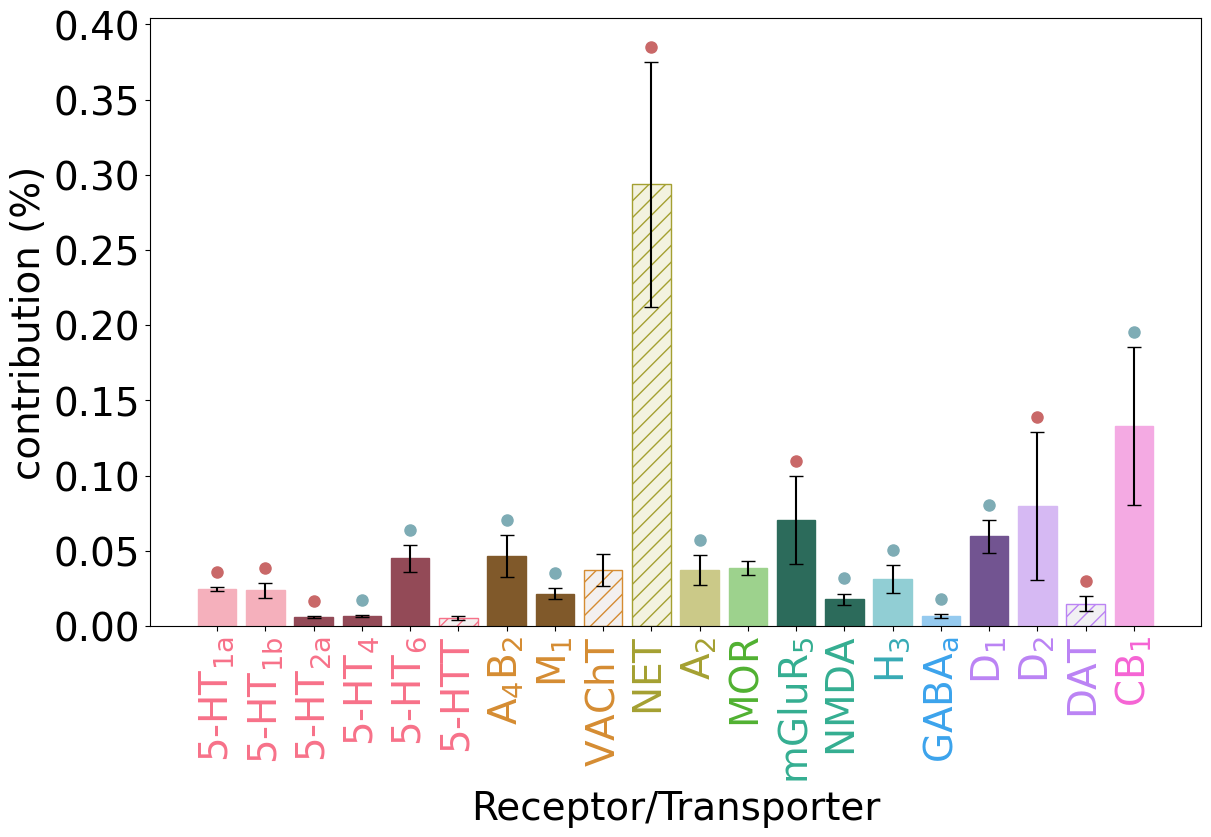

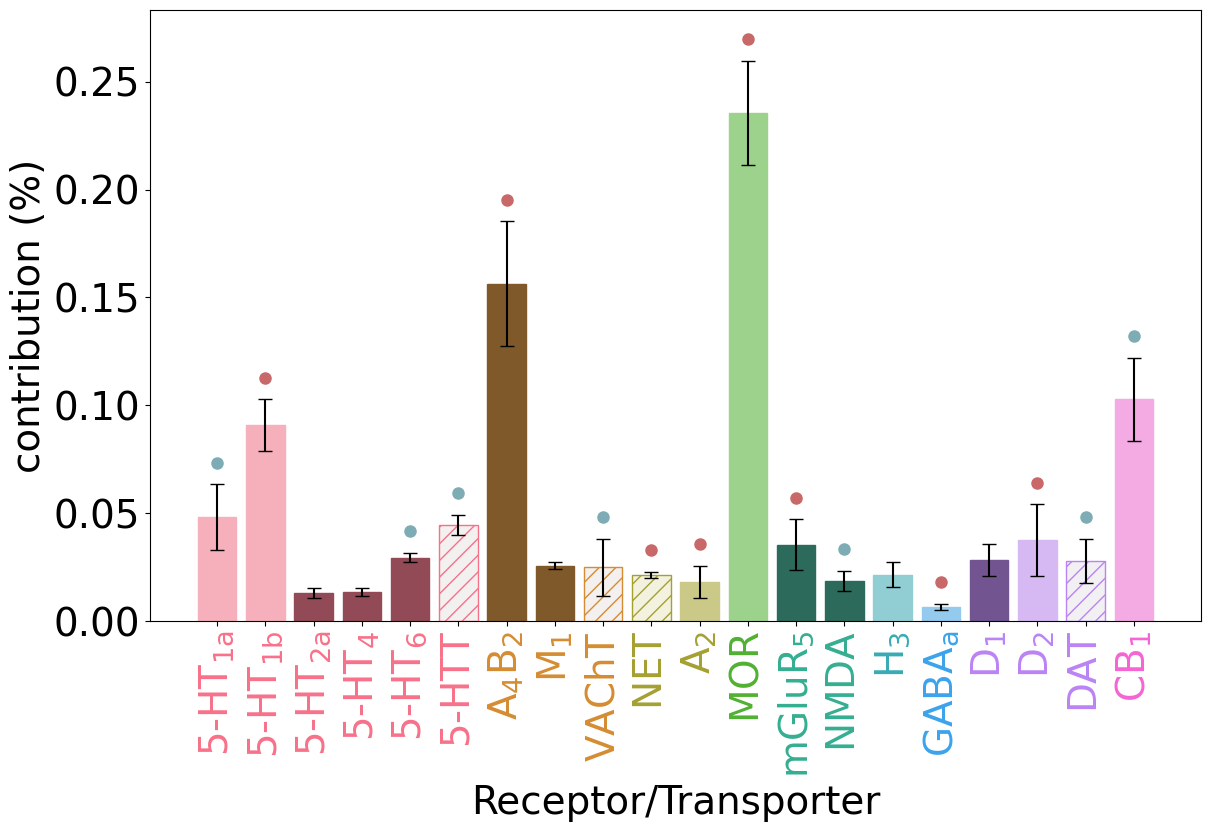

In [8]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'font.size': 18})

for latent_var in laten_var_int:
    results_list = []
    signs_mean_list = []
    for exp in experiments:
        first_dir = os.path.join(paths.home_dir,exp,params.mask,'first_level')
        reg_dir = os.path.join(first_dir, 'regressions', 'PET2')
        second_dir = os.path.join(paths.home_dir,exp,params.mask,'second_level')
        results = pd.read_pickle(os.path.join(second_dir, f'beta_{latent_var}_group_da.pickle'))
        total_dominance_array = results["total_dominance"]
        results_df = pd.DataFrame([total_dominance_array], columns=rec.receptor_names)
        if 'a2' in results_df.columns:
            results_df.rename(columns={'a2': 'A2'}, inplace=True)
        results_list.append(results_df)
        fname = f'{latent_var}_{mask}_regression_results_bysubject_all.csv'
        sign_results = pd.read_csv(os.path.join(reg_dir, fname))
        if 'a2' in sign_results.columns:
            sign_results.rename(columns={'a2': 'A2'}, inplace=True)
        signs = sign_results.mean(axis=0) #mean correlation for each receptor
        signs_mean_list.append(signs)

    results_all = pd.concat(results_list, axis=0, ignore_index=True)
    signs_all = pd.concat(signs_mean_list, axis=1).T
    sign_mean = signs_all.mean()

    receptor_to_group = {}
    for group_idx, group in enumerate(receptor_groups):
        for receptor in group:
            receptor_to_group[receptor] = group_idx

    ordered_receptors = [receptor for group in receptor_groups for receptor in group]

    receptor_to_class = {}
    for class_idx, class_group in enumerate(receptor_class):
        for receptor in class_group:
            receptor_to_class[receptor] = class_idx

    # Assign colors to each group
    base_colors = sns.color_palette('husl', len(receptor_groups))
    colors = []
    for receptor in ordered_receptors:
        group_idx = receptor_to_group.get(receptor, -1)
        class_type = receptor_to_class.get(receptor, -1)
        if class_type == 0:  # Excitatory
            color = sns.dark_palette(base_colors[group_idx], n_colors=3)[1]
            colors.append({'face': color, 'edge': color})
        elif class_type == 1:  # Inhibitory
            color = sns.light_palette(base_colors[group_idx], n_colors=3)[1]
            colors.append({'face': color, 'edge': color})
        else:
            face_color = sns.light_palette(base_colors[group_idx], n_colors=3)[0]
            edge_color = sns.dark_palette(base_colors[group_idx], n_colors=3)[2]
            colors.append({'face': face_color, 'edge': edge_color})

    fig, ax = plt.subplots(figsize=(12, 8))


    # Standardize the data by total model fit
    standardized_df = results_all[ordered_receptors].div(results_all[ordered_receptors].sum(axis=1), axis=0)

    sem_data = standardized_df[ordered_receptors].sem() 
    bar_data = standardized_df[ordered_receptors].mean()
    bar_data = bar_data.reset_index()
    bar_data.columns = ['receptor', 'mean_value']
    bar_data['sem'] = sem_data.values

    bars = ax.bar(bar_data['receptor'], bar_data['mean_value'], yerr=bar_data['sem'],
                color=[color['face'] for color in colors], edgecolor=[color['edge'] for color in colors], capsize=5)

    # Manually add hatch patterns
    for i, (receptor, color) in enumerate(zip(ordered_receptors, colors)):
        if receptor not in receptor_class[0] and receptor not in receptor_class[1]:
            bars[i].set_hatch('//')

    for i, receptor in enumerate(bar_data['receptor']):
        # Perform a one-sample t-test for each receptor against 0
        t_stat, p_value = ttest_1samp(sign_results[receptor], 0)
        if p_value < 0.05:
            # Get the mean and SEM for the position
            mean_value = bar_data['mean_value'].iloc[i]
            sem = bar_data['sem'].iloc[i]
            sign_val = sign_mean[receptor]
            if (params.db == 'Explore') & (latent_var == 'confidence'):
                sign_val = sign_val * (-1)
            dot_color = '#C96868' if sign_val > 0 else '#7EACB5'
            y_position = mean_value + sem + 0.01
            ax.plot(i, y_position, 'o', color=dot_color, markersize=8, label='_nolegend_')
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    ax.set_xticks(np.arange(len(ordered_receptors)))
    ax.set_xticklabels(receptor_label_formatted, rotation=90)
    for label, receptor in zip(ax.get_xticklabels(), ordered_receptors):
        group_idx = receptor_to_group.get(receptor, -1)
        label.set_color(base_colors[group_idx])
    ax.set_xlabel('Receptor/Transporter')
    ax.set_ylabel('contribution (%)')
    plt.tight_layout()
    
    fname = f'{latent_var}_mean_dominance.png'
    fig_dir = os.path.join(output_dir, 'plots')
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight')

    for text in ax.get_figure().findobj(plt.Text):
        text.set_fontsize(28)

    fname = f'group_{latent_var}_mean_dominance_poster.png'
    fig_dir = os.path.join(output_dir, 'plots')
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight', transparent=True)




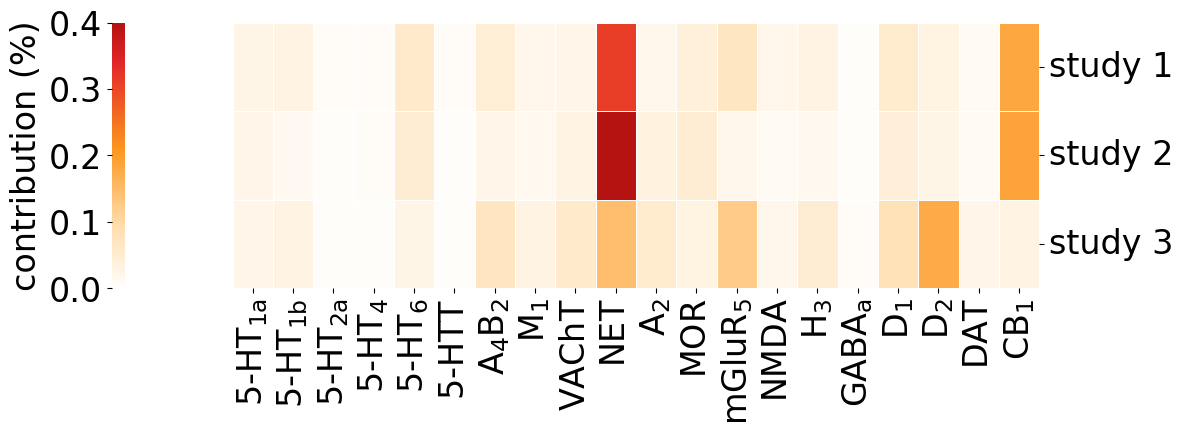

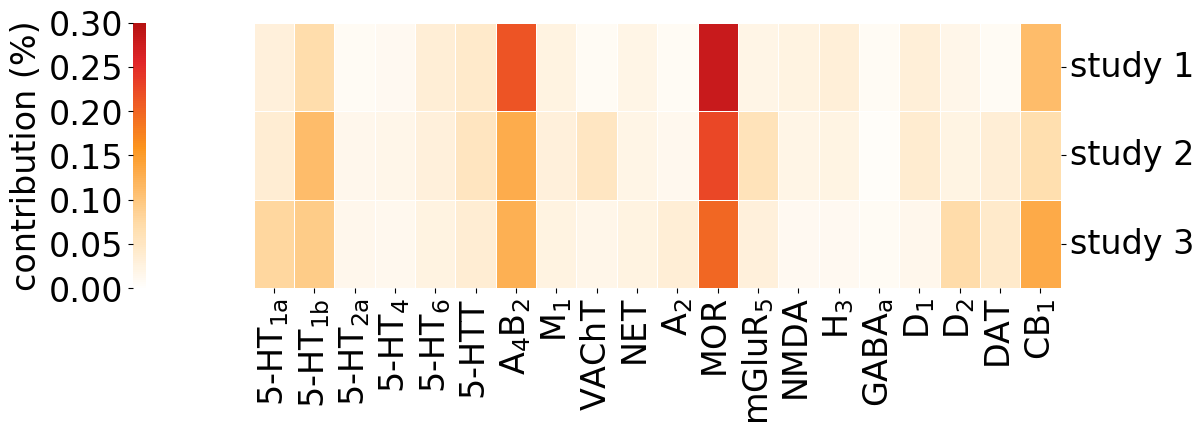

In [15]:
from matplotlib.colors import LinearSegmentedColormap

beta_dir = os.path.join(paths.home_dir,params.db,params.mask,'first_level')

#cmap_seq = sns.color_palette("3A6D8C", as_cmap=True)
cmap_seq = ListedColormap(cmap[128:, :])

# colors = ['#FFFFFF', '#C96868']  
# cmap_seq = LinearSegmentedColormap.from_list('custom_white_to_red', colors)

receptor_to_group = {}
for group_idx, group in enumerate(receptor_groups):
    for receptor in group:
        receptor_to_group[receptor] = group_idx

ordered_receptors = [receptor for group in receptor_groups for receptor in group]

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
for latent_var in laten_var_int:
    results_list = []
    signs_mean_list = []
    plt.rcParams.update({'font.size': 14})
    for indx, exp in enumerate(experiments):
        second_dir = os.path.join(paths.home_dir,exp,params.mask,'second_level')
        results = pd.read_pickle(os.path.join(second_dir, f'beta_{latent_var}_group_da.pickle'))
        total_dominance_array = results["total_dominance"]
        results_df = pd.DataFrame([total_dominance_array], columns=rec.receptor_names)
        if 'a2' in results_df.columns:
            results_df.rename(columns={'a2': 'A2'}, inplace=True)
        standardized_df = results_df[ordered_receptors].div(results_df[ordered_receptors].sum(axis=1), axis=0)
        results_mean = standardized_df.mean(axis=0)
        results_mean.name = f'study {indx+1}'
        results_list.append(results_mean)

    all_means=pd.concat(results_list, axis=1).T

    fig, ax = plt.subplots(figsize=(12, 4))
    if latent_var == 'surprise':
        sns.heatmap(all_means[ordered_receptors],
                    xticklabels=receptor_label_formatted,
                    cmap=cmap_seq, linewidths=.5, vmin=0, vmax=0.4,cbar_kws = dict(location="left", label='contribution (%)'))
    else:
        sns.heatmap(all_means[ordered_receptors],
            xticklabels=receptor_label_formatted,
                    cmap=cmap_seq, linewidths=.5, vmin=0, vmax=0.3,cbar_kws = dict(location="left", label='contribution (%)'))
    #ax.tick_params(right=True, labelright=True, labelrotation=0)
    plt.yticks(rotation=0) 
    plt.tight_layout()

    fname = f'group_{latent_var}_mean_dominance_heatmap.png'
    fig_dir = os.path.join(output_dir, 'plots')
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight')

    for text in ax.get_figure().findobj(plt.Text):
            text.set_fontsize(24)

    fname = f'group_{latent_var}_mean_dominance_heatmap_poster.png'
    fig_dir = os.path.join(output_dir, 'plots')
    plt.savefig(os.path.join(fig_dir, fname), dpi=300, bbox_inches='tight', transparent=True)

## Plot for probabaility task

In [6]:
import glob
import os
import pandas as pd
import fmri_funcs as fun
import main_funcs as mf
import io_funcs as iof
import matplotlib.pyplot as plt

from params_and_paths import Params, Paths

paths = Paths()
params = Params()

In [7]:
sub = 5
sess = 3
beh_dir  = mf.get_beh_dir(params.db)

#2/4
#4/2



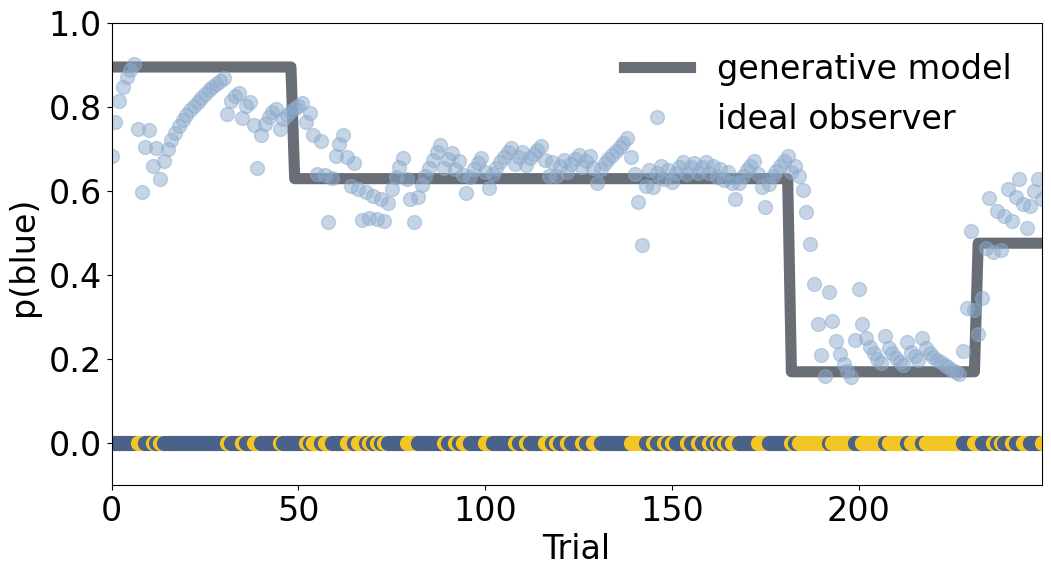

In [8]:
seq = mf.get_seq(db=params.db,
                sub=sub,
                sess=sess,
                beh_dir=beh_dir)
filepath = glob.glob(os.path.join(beh_dir,
                            'behavior',
                            f'sub-{sub:02d}*',
                            f'*sess_{sess}.csv'))[0]
data = pd.read_csv(filepath, header=1)
data = data.iloc[1:,].reset_index()
io_inference = iof.get_post_inference(seq=seq,
                                    seq_type= params.seq_type, 
                                    options=params.io_options)

#plot generative sequence +  IO estimates
# Plotting
plt.rcParams.update({'font.size': 24})

plt.figure(figsize=(12, 6))
data = 1-(data['p1'])
data = data[:250]
inference = io_inference['p1_mean_array'][:250]
plt.plot(data, label='generative model', linewidth=8, color='#686D76')  # Plot p1 as a continuous line
plt.plot(inference, 'o', label='ideal observer', color= '#8EACCD', alpha=.5, markersize=10)  # Plot p1_mean_array as dots
for idx, value in enumerate(seq[:250]):
    color = '#4A628A' if value == 1 else '#F3C623'
    plt.plot(idx, 0, 'o', color=color, markersize=10)  # Adjust markersize as needed
plt.xlim(0, len(data) - 1)
plt.xlabel('Trial')
plt.ylabel('p(blue) ')
plt.ylim(-0.1,1)
plt.legend(frameon=False, loc='upper right')

#folder for figures 
output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

fname = 'probability_learner_example.png'
plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight', transparent=True)
fname = 'probability_learner_example.svg'
plt.savefig(os.path.join(output_dir, fname), bbox_inches='tight', transparent=True)

In [9]:
mean = io_inference['p1_mean_array'][150]
sd =  io_inference['p1_sd_array'][150]

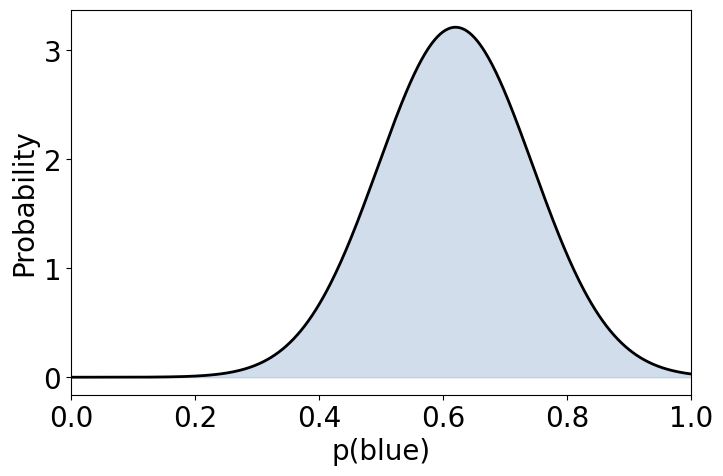

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({'font.size': 20})

# Function to plot normal distribution
def plot_distribution(mean=0, sd=1):
    x = np.linspace(mean - 4*sd, mean + 4*sd, 500)  # X-axis range based on SD
    y = (1/(sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sd)**2)  # Gaussian formula

    plt.figure(figsize=(8, 5))

    # Extend the black outline if SD is small
    if sd < 0.5:
        x_ext = np.linspace(0, 1, 500)  # Ensure full x-range coverage
        y_ext = (1/(sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_ext - mean) / sd)**2)
        plt.plot(x_ext, y_ext, linewidth=2, color="black")
    else:
        plt.plot(x, y, linewidth=2, color="black")

    plt.fill_between(x, y, color="#8EACCD", alpha=0.4)  # Gray shaded area
    plt.xlim(0, 1)

    # Labels
    plt.ylabel("Probability", fontsize=20)
    plt.xlabel("p(blue)", fontsize=20)
    # Remove background
    plt.gca().set_facecolor('none')

# Call the function with a specific standard deviation
plot_distribution(mean=mean,sd=sd)

output_dir = '/home/ah278717/neuromodulation_assay/figures/'

fname = 'distribution.png'
plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight', transparent=True)
fname = 'distribution.svg'
plt.savefig(os.path.join(output_dir, fname), bbox_inches='tight', transparent=True)

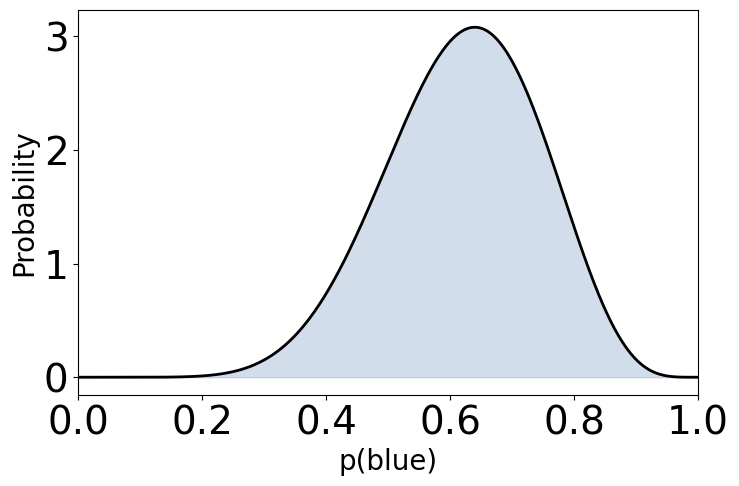

In [23]:
from scipy.stats import beta
# Calculate alpha and beta
plt.rcParams.update({'font.size': 28})
mean = io_inference['p1_mean_array'][150]
sd =  io_inference['p1_sd_array'][150]

variance = sd ** 2
nu = mean * (1 - mean) / variance - 1
alpha = mean * nu
beta_param = (1 - mean) * nu

# Create x values and PDF
x = np.linspace(0, 1, 500)
pdf = beta.pdf(x, alpha, beta_param)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, linewidth=2, color="black")
plt.fill_between(x, pdf, color="#8EACCD", alpha=0.4)  # Gray shaded area
plt.xlim(0, 1)

# Labels
plt.ylabel("Probability", fontsize=20)
plt.xlabel("p(blue)", fontsize=20)
# Remove background
plt.gca().set_facecolor('none')

output_dir = '/home/ah278717/neuromodulation_assay/figures/'

fname = 'distribution.png'
plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight', transparent=True)
fname = 'distribution.svg'
plt.savefig(os.path.join(output_dir, fname), bbox_inches='tight', transparent=True)

## Plot Explore

In [11]:
sub = 3
sess = 1

/home/ah278717/neuromodulation_assay/initialize_subject.py:188: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["PE_prevrep"] = df["PE_prev"] * df["repeat_sign"]
/home/ah278717/neuromodulation_assay/initialize_subject.py:193: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col + '_diff'] = np.diff(df[[col + '_A', col + '_B']], axis=1)
/home/ah278717/neuromodulation_assay/initialize_subject.py:194: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

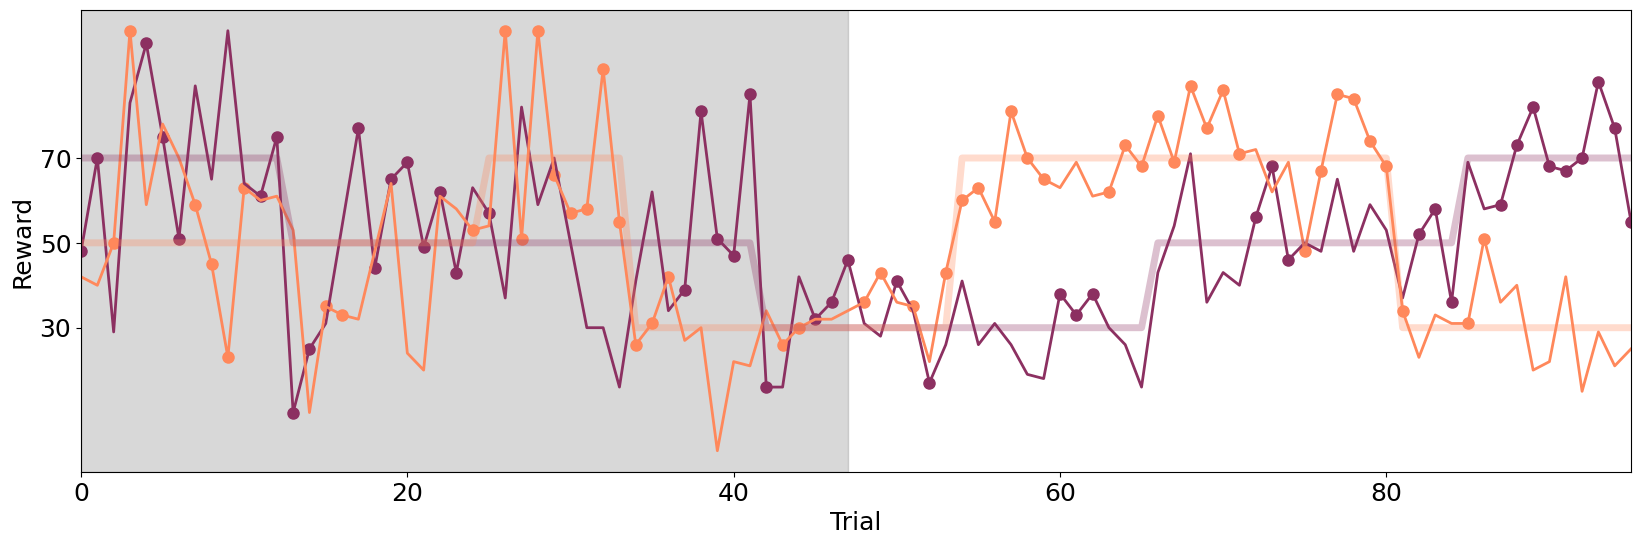

In [12]:
para = mf.initialize_subject(sub)
para=para.iloc[:96]
#mark choiceA or choiceB
# a and B as reward seen
# A_mean or B_mean

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20,6))
plt.plot(para['obs_A'],'o', markersize=8, color='#8C3061')
plt.plot(para['obs_B'],'o', markersize=8, color='#FF885B')
plt.plot(para['A'],linewidth=2, color='#8C3061')
plt.plot(para['B'], linewidth=2, color='#FF885B')
plt.plot(para['A_mean'],linewidth=5, color='#8C3061', alpha=.3)
plt.plot(para['B_mean'],linewidth=5, color='#FF885B', alpha=.3)
#mark high noise grey
start = None
for idx, value in enumerate(para['SD']):
    if value == 20 and start is None:  # Start of a new shaded region
        start = idx
    elif value != 20 and start is not None:  # End of a shaded region
        plt.axvspan(start, idx - 1, color='grey', alpha=0.3)
        start = None
# Check if a shaded region was open at the end of the loop
if start is not None:
    plt.axvspan(start, len(para['SD']) - 1, color='grey', alpha=0.3)
plt.xlim(0, len(para['B']) - 1)
plt.yticks([30, 50, 70])
plt.xlabel('Trial')
plt.ylabel('Reward')

#folder for figures 
output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

fname = 'reward_learner_task.png'
plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight')

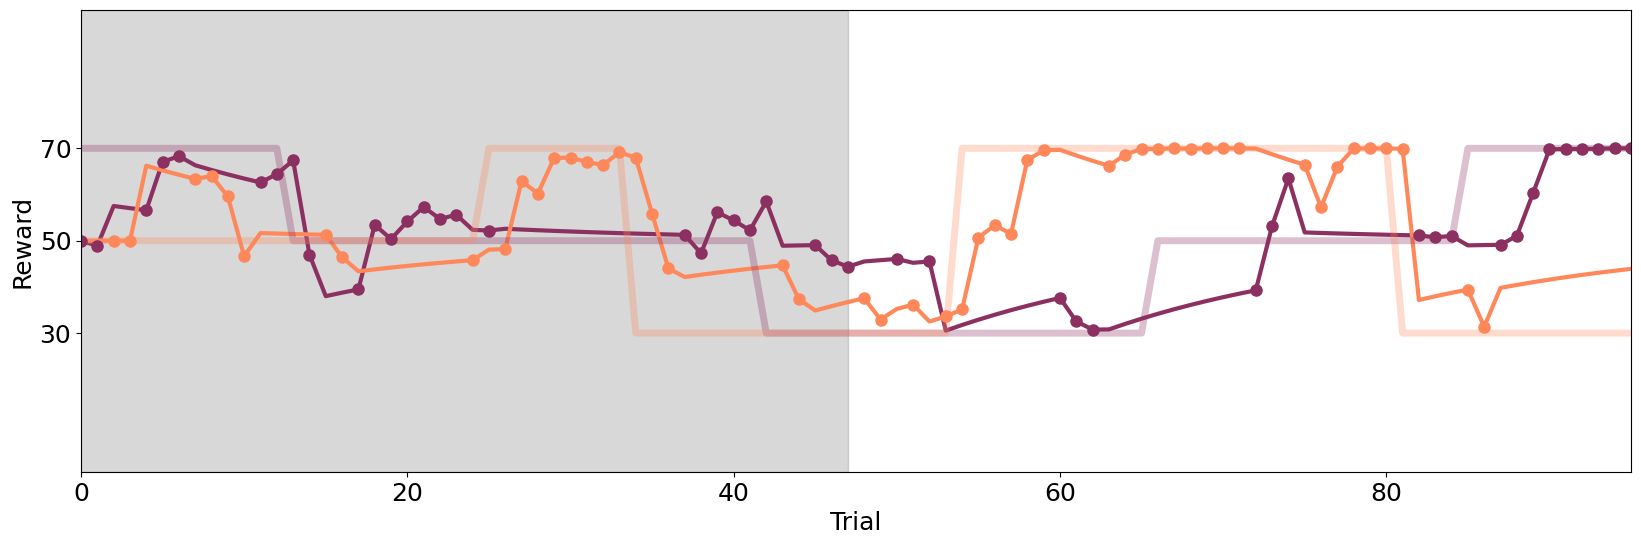

In [13]:
import numpy as np

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20,6))
# plt.plot(para['obs_A'],'o', markersize=8, color='#8C3061')
# plt.plot(para['obs_B'],'o', markersize=8, color='#FF885B')
plt.plot(para['ER_A'],linewidth=3, color='#8C3061')
plt.plot(para['ER_B'], linewidth=3, color='#FF885B')
plt.plot(para['A_mean'],linewidth=5, color='#8C3061', alpha=.3)
plt.plot(para['B_mean'],linewidth=5, color='#FF885B', alpha=.3)
#mark high noise grey
start = None
for idx, value in enumerate(para['SD']):
    if value == 20 and start is None:  # Start of a new shaded region
        start = idx
    elif value != 20 and start is not None:  # End of a shaded region
        plt.axvspan(start, idx - 1, color='grey', alpha=0.3)
        start = None
# Check if a shaded region was open at the end of the loop
if start is not None:
    plt.axvspan(start, len(para['SD']) - 1, color='grey', alpha=0.3)

# Plotting ER_A or ER_B conditionally based on obs_A
for idx in range(len(para)):
    if not np.isnan(para['obs_A'].iloc[idx]):
        plt.plot(idx, para['ER_A'].iloc[idx], 'o', markersize=8, color='#8C3061', label='ER_A' if idx == 0 else "")
    else:
        plt.plot(idx, para['ER_B'].iloc[idx], 'o', markersize=8, color='#FF885B', label='ER_B' if idx == 0 else "")

plt.xlim(0, len(para['B']) - 1)
plt.ylim(0,100)
plt.yticks([30, 50, 70])
plt.xlabel('Trial')
plt.ylabel('Reward')

#folder for figures 
output_dir = '/home/ah278717/neuromodulation_assay/figures/'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

fname = 'reward_learner_IO.png'
plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight')

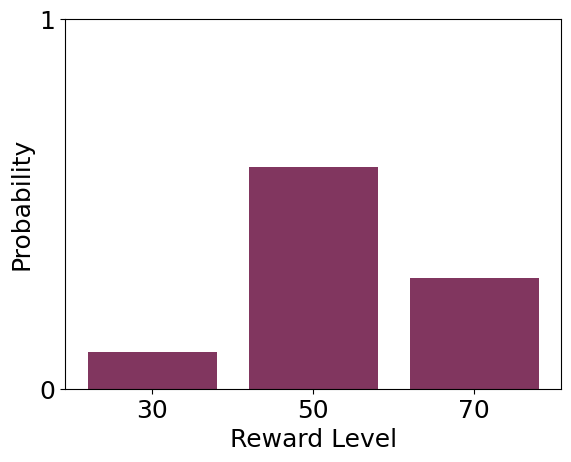

In [16]:
# Data for the bar plot
plt.rcParams.update({'font.size': 18})

x_positions = [1, 2, 3]  # Custom positions for bars
x_labels = [30, 50, 70]  # Labels for the x-axis
y_values = [0.1, 0.6, 0.3]  # Heights of the bars

# Create the bar plot
plt.bar(x_positions, y_values, color='#81365F')

# Set custom x-axis labels
plt.xticks(x_positions, x_labels)  # Only show labels at the bar positions

# Set axis labels
plt.ylabel("Probability")
plt.xlabel("Reward Level")

# Customize y-axis ticks
plt.yticks([0, 1])

# Show the plot
fname = 'distribution_explore.svg'
plt.savefig(os.path.join(output_dir, fname), bbox_inches='tight', transparent=True)

In [ ]:
#ER_A and ER_B for expected reward --> how is the not observed value updated? coupled or not?

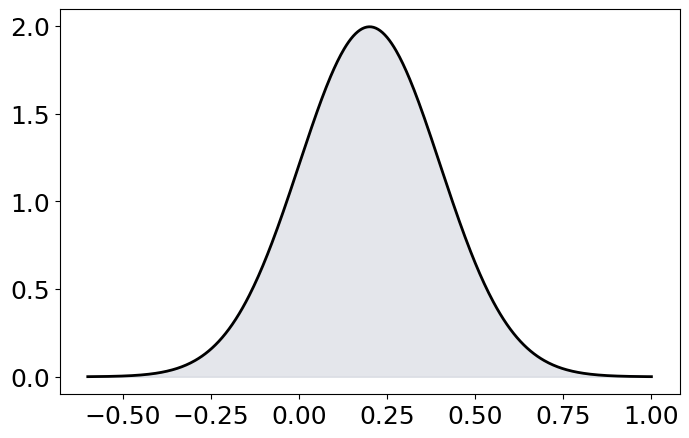

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot normal distribution
def plot_distribution(sd=0.2):
    mean = 0.2  # Centered in the middle
    x = np.linspace(mean - 4*sd, mean + 4*sd, 500)  # X-axis range based on SD
    y = (1/(sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sd)**2)  # Gaussian formula

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, linewidth=2, color="black")
    plt.fill_between(x, y, color="#A6AEBF", alpha=0.3)  # Gray shaded area


    # Remove background, ticks, and axis
    plt.gca().set_facecolor('none')
    #plt.axis('off')

# Call the function with a specific standard deviation
plot_distribution(sd=0.2)

output_dir = '/home/ah278717/neuromodulation_assay/figures/'

fname = 'distribution.png'
plt.savefig(os.path.join(output_dir, fname), dpi=300, bbox_inches='tight', transparent=True)

In [16]:
import numpy as np

receptor = np.array([0.035, 0.018,0.019])
beta = np.array([0.21,0.17,0.078])
print(receptor/beta)

[0.16666667 0.10588235 0.24358974]


In [15]:
0.025/0.15

0.16666666666666669

In [17]:
from scipy.stats import sem

sem(receptor)

0.005507570547286103